In [1]:
import time
import math
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from copy import copy, deepcopy
from pprint import pprint
from functools import partial
from numpy.linalg import norm
from matplotlib import pyplot as plt

In [3]:
def check_dd(A: list):
    dd = True
    for i, row in enumerate(A):
        de = abs(A[i][i])
        non_des = [abs(x) for j, x in enumerate(row) if i != j]
        if not (de > sum(non_des)):
            dd = False
            break
    if dd:
        print("Diagonally dominant")
        
    else:
        print("Not diagonally dominant!!")
        nond_indices = []
        nond_vectors = []
        for i in range(len(A)):
            row = A[i]
            de = abs(A[i][i])
            non_des = [abs(x) for j, x in enumerate(row) if i != j]
            if not (de > sum(non_des)):
                nond_indices.append(i)
                nond_vectors.append((i, row))
        
        for index, each_row in nond_vectors:
            for each_index in nond_indices:
                if abs(each_row[each_index]) > sum([abs(x) for j, x in enumerate(each_row) if j != each_index]):
                    nond_indices.remove(each_index)
                    break
                    
        if len(nond_indices) == 0:
            print(f"Can be converted to diagonally dominant!!")
        else:
            print("Cannot be converted to diagonally dominant")


In [34]:
n = 8
A = [[random.uniform(-20, 20) for _ in range(n)] for _ in range(n)]
print(A)
check_dd(A)

[[-18.187396310868262, 7.683903382098585, -2.8841727971653306, -5.544864726541681, -12.91898429256717, 0.43438152877889635, 0.7825165135225163, 0.611302424655559], [18.047779402986784, -19.216208977916214, -9.782875202571763, 5.455855763059496, 8.51910954257604, -2.60713428946692, -10.639352949902303, 3.9063207729753273], [0.7131642994229779, -8.23758310332671, 16.594870472517613, -8.043218040069311, 2.789203718592887, 9.272538432852645, 2.4438446082062093, 13.087312087201582], [-1.6637521507321935, -14.05912000414554, -12.736352695673748, -1.8892242012753684, -10.964814313769802, -16.07609174146054, 17.976307960261273, -8.055805970936767], [16.20785211403627, 0.26059450002305695, -14.898917120488452, -9.064105242338494, -2.5705146255148037, -7.849906513365216, -9.756897804025852, -11.827839125599965], [6.517868398050041, -10.302546916049762, -14.308778005995059, -9.991236514175, -2.2046208376196255, 12.480146194144403, 11.118548666110101, -7.719614576165132], [8.824271634038343, 6.694

In [5]:
#q2.2
def guass_seidel(matrix: list, iterations: int = 1):
    for i, row in enumerate(matrix):
        if row[i] != 1:
            row = [x/row[i] for x in row]
            matrix[i] = row
    
    I = []
    for i in range(len(matrix)):
        I.append([matrix[i][j] if i==j else 0 for j in range(len(matrix))])

    L = []
    for i in range(len(matrix)):
        L.append([matrix[i][j] if j < i else 0 for j in range(len(matrix))])
        
    U = []
    for i in range(len(matrix)):
        U.append([matrix[i][j] if j > i else 0 for j in range(len(matrix))])
    
    I = np.matrix(I)
    L = np.matrix(L)
    U = np.matrix(U)
    P = np.linalg.inv(I + L) * U

    print("Iteration matrix:")
    print(P)
    
    print(f"1 norm: {np.linalg.norm(P, ord = 1)}")
    print(f"Inf norm: {np.linalg.norm(P, ord = np.inf)}")
    print(f"Fro norm: {np.linalg.norm(P, ord = 'fro')}")
    

In [28]:
n = 4
A = [[random.randrange(-100, 100) for _ in range(n)] for _ in range(n)]
print(A)
guass_seidel(matrix= A)

[[-85, 82, -91, -31], [-77, 82, -92, -32], [-32, -45, 57, -56], [-22, 37, -32, -18]]
Iteration matrix:
[[ 0.         -0.96470588  1.07058824  0.36470588]
 [ 0.         -0.90588235 -0.11664275 -0.04777618]
 [ 0.         -1.25675955  0.50894561 -0.81542702]
 [ 0.          1.55123266 -2.45305458  0.9056898 ]]
1 norm: 4.678580438023164
Inf norm: 4.909977038882876
Fro norm: 3.846271296767205


In [33]:
#2.3
def guass_jacobi(matrix: list, iterations: int = 1):    
    D = []
    for i in range(len(matrix)):
        D.append([matrix[i][j] if i==j else 0 for j in range(len(matrix))])

    L = []
    for i in range(len(matrix)):
        L.append([matrix[i][j] if j < i else 0 for j in range(len(matrix))])
        
    U = []
    for i in range(len(matrix)):
        U.append([matrix[i][j] if j > i else 0 for j in range(len(matrix))])
    
    D = np.matrix(D)
    L = np.matrix(L)
    U = np.matrix(U)
    P = np.linalg.inv(D) * (L + U)

    print("Iteration matrix:")
    print(P)
    
    print(f"1 norm: {np.linalg.norm(P, ord = 1)}")
    print(f"Inf norm: {np.linalg.norm(P, ord = np.inf)}")
    print(f"Fro norm: {np.linalg.norm(P, ord = 'fro')}")
n = 4
A = [[random.randint(-100, 100) for _ in range(n)] for _ in range(n)]
print(A)
guass_jacobi(matrix= A)

[[21, 93, -53, 53], [-73, -1, -73, 43], [-10, 76, -100, -75], [31, -63, -5, 66]]
Iteration matrix:
[[  0.           4.42857143  -2.52380952   2.52380952]
 [ 73.           0.          73.         -43.        ]
 [  0.1         -0.76         0.           0.75      ]
 [  0.46969697  -0.95454545  -0.07575758   0.        ]]
1 norm: 75.5995670995671
Inf norm: 189.0
Fro norm: 111.98945970671222


In [30]:
#2.4
def guass_seidel_iterations(A: list, b: list, iterations: int):
    initial_variables = {}
    for i in range(len(A)):
        initial_variables[f'x{i}'] = random.randint(-10, 10)
    
    # Guass Seidel iterations
    iteration_history = [deepcopy(initial_variables)]
    for each_iter in range(iterations):
        for ri, (k, v) in enumerate(initial_variables.items()):
            other_vars = [A[ri][j] * initial_variables[f'x{j}'] for j in range(len(A[ri])) if j != ri]
            other_vars_sum = sum(other_vars)
            initial_variables[f'x{ri}'] = (b[ri] - other_vars_sum) / A[ri][ri]
    
        iteration_history.append(deepcopy(initial_variables))
    
    iteration_history = pd.DataFrame(iteration_history)
    iteration_history['||xk+1 - xk||2'] = (iteration_history - iteration_history.shift(1)).apply(norm, axis = 1)
    iteration_history = iteration_history.reset_index().rename(columns = {'index': 'iteration'})
    return iteration_history
    
n = 4
A = [[random.randint(-10, 10) for _ in range(n)] for _ in range(n)]
b = [random.randint(-10, 10) for _ in range(n)]
print(A)
print(b)
iteration_df = guass_seidel_iterations(A = A, 
                                       b = b,
                                       iterations= 10)
iteration_df

[[3, -5, 2, 9], [-1, -9, 5, -8], [-9, 9, -1, -3], [3, -3, -8, -1]]
[-3, 8, 0, 5]


,iteration,x0,x1,x2,x3,||xk+1 - xk||2
0,0,3.000000e+00,-5.000000e+00,3.000000e+00,2.000000e+00,NaN
1,1,-1.733333e+01,9.259259e-01,1.583333e+02,-1.326444e+03,1.337663e+03
2,2,3.874321e+03,8.356557e+02,-2.336865e+04,1.960602e+05,1.988237e+05
3,3,-5.712098e+05,-1.237915e+05,3.438584e+06,-2.885094e+07,2.925849e+07
4,4,8.405410e+07,1.821626e+07,-5.059878e+08,4.245416e+09,4.305388e+09
5,5,-1.236856e+10,-2.680523e+09,7.445610e+10,-6.247129e+11,6.335379e+11
6,6,1.820034e+12,3.944389e+11,-1.095622e+13,9.192651e+13,9.322511e+13
7,7,-2.678180e+14,-5.804169e+13,1.612207e+15,-1.352699e+16,1.371807e+16
8,8,3.940942e+16,8.540835e+15,-2.372363e+17,1.990496e+18,2.018615e+18
9,9,-5.799096e+18,-1.256784e+18,3.490932e+19,-2.929015e+20,2.970392e+20


<AxesSubplot:xlabel='iteration'>

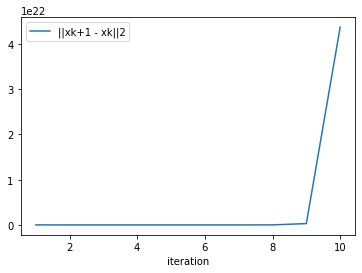

In [31]:
iteration_df.plot(x = 'iteration', y = '||xk+1 - xk||2')

In [24]:
def guass_jacobi_iterations(A: list, b: list, iterations: int):
    initial_variables = {}
    for i in range(len(A)):
        initial_variables[f'x{i}'] = random.randint(-10, 10)
    
    iteration_history = [deepcopy(initial_variables)]
    for each_iter in range(iterations):
        current_iteration_updates = {}
        for ri, (k, v) in enumerate(initial_variables.items()):
            other_vars = [A[ri][j] * initial_variables[f'x{j}'] for j in range(len(A[ri])) if j != ri]
            other_vars_sum = sum(other_vars)
            current_iteration_updates[f'x{ri}'] = (b[ri] - other_vars_sum) / A[ri][ri]
        for k, v in current_iteration_updates.items():
            initial_variables[k] = v
        iteration_history.append(deepcopy(initial_variables))
    
    iteration_history = pd.DataFrame(iteration_history)
    iteration_history['||xk+1 - xk||2'] = (iteration_history - iteration_history.shift(1)).apply(norm, axis = 1)
    iteration_history = iteration_history.reset_index().rename(columns = {'index': 'iteration'})
    return iteration_history
n = 4
A = [[random.randint(-50, 20) for _ in range(n)] for _ in range(n)]
b = [random.randint(-20, 20) for _ in range(n)]
print(A)
print(b)
iteration_df = guass_jacobi_iterations(A = A, 
                                       b = b,
                                       iterations= 10)
iteration_df

[[-40, -8, -37, -14], [-23, -42, -28, -39], [-40, -6, 12, -49], [-32, -7, 4, 17]]
[-1, -18, -13, -4]


,iteration,x0,x1,x2,x3,||xk+1 - xk||2
0,0,-3.000000,4.000000,4.000000,8.000000,NaN
1,1,-7.275000,-8.023810,23.583333,-5.176471,26.832330
2,2,-18.373057,-6.503000,-50.482493,-22.782353,76.949291
3,3,55.995729,65.300045,-158.606297,-25.619344,149.616840
4,4,142.642586,99.291165,113.606801,169.375814,347.543028
5,5,-184.201059,-310.700635,1215.655443,282.421982,1225.647049
6,6,-1161.163852,-971.385365,382.785912,-760.938830,1781.357361
7,7,106.553694,1087.699462,-7464.489075,-2676.004968,8431.734172
8,8,7623.739241,7403.265545,-10029.074907,2404.562985,11348.291709
9,9,6954.669135,278.765201,38931.645766,19758.518480,52435.847472


<AxesSubplot:xlabel='iteration'>

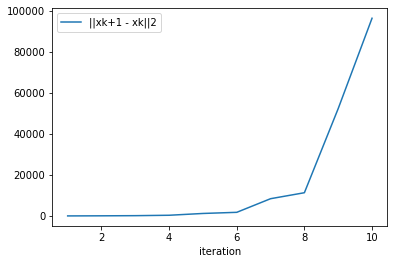

In [26]:
iteration_df.plot(x = 'iteration', y = '||xk+1 - xk||2')